# Napovedovanje Temperature
Vito Zupanič
3. letnik ITK UNI
## Podatkovna množica 
Vir: ARSO
Pridobljena s spletnega arhiva, kjer so zapisi naslednjih značilncih vsakih 30 minut. Začel sem z 2001-01-01 00:00.

### Temperatura
Temperatura - T [°C]
Povprečna temperatura - povp. T [°C]
Minimalna temperatura - min. T [°C]
Maksimalna temperatura - max. T [°C]

### Tlak
Povprečen tlak - povp. tlak [hPa]
Minimalen tlak - min. tlak [hPa]
Maksimalen tlak - max. tlak [hpa]
Količina padavin [mm]

### Vlaga
Relativna vlaga - rel. vla. [%]
Povprečna relativna vlaga - povp. rel. vla. [%]
Minimalna relativna vlaga - min. rel. vla. [%]
Maksimalna relativna vlaga - max. rel. vla. [%]

### Veter
Hitrost vetra [m/s]
Smer vetra [°]
Sunki vetra [m/s]

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.dates as mdates

In [170]:
df1 = pd.read_csv("podatki_vreme_1_1.csv", delimiter=",", decimal=".", index_col=0)
df2 =  pd.read_csv("podatki_vreme_2.csv", delimiter=",", decimal=".", index_col=0)

df = pd.concat([df1, df2], axis=1)
print(df.isnull().sum())
print(df.shape)
df.head()

povp. tlak [hPa]         16415
T [°C]                   16088
povp. T [°C]             16123
rel. vla. [%]            16168
povp. rel. vla. [%]      16430
količina padavin [mm]    51728
hitrost vetra [m/s]      18893
smer vetra [°]           18871
min. tlak [hPa]          16557
max. tlak [hpa]          16557
min. T [°C]              16190
max. T [°C]              16174
min. rel. vla. [%]       16613
max. rel. vla. [%]       16613
sunki vetra [m/s]        18882
dtype: int64
(402768, 15)


povp. tlak [hPa]  T [°C]  povp. T [°C]  rel. vla. [%]  \
date                                                                      
2001-01-01 00:00               NaN     NaN           NaN            NaN   
2001-01-01 00:30               NaN     NaN           NaN            NaN   
2001-01-01 01:00               NaN     NaN           NaN            NaN   
2001-01-01 01:30               NaN     NaN           NaN            NaN   
2001-01-01 02:00               NaN     NaN           NaN            NaN   

                  povp. rel. vla. [%]  količina padavin [mm]  \
date                                                           
2001-01-01 00:00                  NaN                    NaN   
2001-01-01 00:30                  NaN                    NaN   
2001-01-01 01:00                  NaN                    NaN   
2001-01-01 01:30                  NaN                    NaN   
2001-01-01 02:00                  NaN                    NaN   

                  hitrost vetra [m/s]  smer vetra [°]  min. tlak [hPa]  \
date                                                                     
2001-01-01 00:00                  NaN             NaN              NaN   
2001-01-01 00:30                  NaN             NaN              NaN   
2001-01-01 01:00                  NaN             NaN              NaN   
2001-01-01 01:30                  NaN             NaN              NaN   
2001-01-01 02:00                  NaN             NaN              NaN   

                  max. tlak [hpa]  min. T [°C]  max. T [°C]  \
date                                                          
2001-01-01 00:00              NaN          NaN          NaN   
2001-01-01 00:30              NaN          NaN          NaN   
2001-01-01 01:00              NaN          NaN          NaN   
2001-01-01 01:30              NaN          NaN          NaN   
2001-01-01 02:00              NaN          NaN          NaN   

                  min. rel. vla. [%]  max. rel. vla. [%]  sunki vetra [m/s]  
date                                                                         
2001-01-01 00:00                 NaN                 NaN                NaN  
2001-01-01 00:30                 NaN                 NaN                NaN  
2001-01-01 01:00                 NaN                 NaN                NaN  
2001-01-01 01:30                 NaN                 NaN                NaN  
2001-01-01 02:00                 NaN                 NaN                NaN

### Odstranimo vse vrstice, ki imajo čisto vse stolpce prazne
Takih je 13.740

In [171]:
df.dropna(how='all', inplace=True)
print(df.shape)
df.head()

(389028, 15)


povp. tlak [hPa]  T [°C]  povp. T [°C]  rel. vla. [%]  \
date                                                                      
2001-10-01 00:00             986.0    14.7          14.7           95.0   
2001-10-01 00:30             986.0    14.7          14.7           95.0   
2001-10-01 01:00             986.0    14.6          14.7           95.0   
2001-10-01 01:30             986.0    14.6          14.6           95.0   
2001-10-01 02:00             986.0    14.6          14.6           95.0   

                  povp. rel. vla. [%]  količina padavin [mm]  \
date                                                           
2001-10-01 00:00                 95.0                    NaN   
2001-10-01 00:30                 95.0                    NaN   
2001-10-01 01:00                 95.0                    NaN   
2001-10-01 01:30                 95.0                    NaN   
2001-10-01 02:00                 95.0                    NaN   

                  hitrost vetra [m/s]  smer vetra [°]  min. tlak [hPa]  \
date                                                                     
2001-10-01 00:00                  NaN             NaN            986.0   
2001-10-01 00:30                  NaN             NaN            986.0   
2001-10-01 01:00                  NaN             NaN            986.0   
2001-10-01 01:30                  NaN             NaN            986.0   
2001-10-01 02:00                  NaN             NaN            986.0   

                  max. tlak [hpa]  min. T [°C]  max. T [°C]  \
date                                                          
2001-10-01 00:00            986.0         14.7         14.7   
2001-10-01 00:30            986.0         14.7         14.7   
2001-10-01 01:00            986.0         14.6         14.7   
2001-10-01 01:30            986.0         14.6         14.7   
2001-10-01 02:00            986.0         14.6         14.7   

                  min. rel. vla. [%]  max. rel. vla. [%]  sunki vetra [m/s]  
date                                                                         
2001-10-01 00:00                95.0                95.0                NaN  
2001-10-01 00:30                95.0                95.0                NaN  
2001-10-01 01:00                95.0                95.0                NaN  
2001-10-01 01:30                95.0                95.0                NaN  
2001-10-01 02:00                95.0                95.0                NaN

In [172]:
df.isnull().sum()

povp. tlak [hPa]          2675
T [°C]                    2348
povp. T [°C]              2383
rel. vla. [%]             2428
povp. rel. vla. [%]       2690
količina padavin [mm]    37988
hitrost vetra [m/s]       5153
smer vetra [°]            5131
min. tlak [hPa]           2817
max. tlak [hpa]           2817
min. T [°C]               2450
max. T [°C]               2434
min. rel. vla. [%]        2873
max. rel. vla. [%]        2873
sunki vetra [m/s]         5142
dtype: int64

In [173]:
df.head()

povp. tlak [hPa]  T [°C]  povp. T [°C]  rel. vla. [%]  \
date                                                                      
2001-10-01 00:00             986.0    14.7          14.7           95.0   
2001-10-01 00:30             986.0    14.7          14.7           95.0   
2001-10-01 01:00             986.0    14.6          14.7           95.0   
2001-10-01 01:30             986.0    14.6          14.6           95.0   
2001-10-01 02:00             986.0    14.6          14.6           95.0   

                  povp. rel. vla. [%]  količina padavin [mm]  \
date                                                           
2001-10-01 00:00                 95.0                    NaN   
2001-10-01 00:30                 95.0                    NaN   
2001-10-01 01:00                 95.0                    NaN   
2001-10-01 01:30                 95.0                    NaN   
2001-10-01 02:00                 95.0                    NaN   

                  hitrost vetra [m/s]  smer vetra [°]  min. tlak [hPa]  \
date                                                                     
2001-10-01 00:00                  NaN             NaN            986.0   
2001-10-01 00:30                  NaN             NaN            986.0   
2001-10-01 01:00                  NaN             NaN            986.0   
2001-10-01 01:30                  NaN             NaN            986.0   
2001-10-01 02:00                  NaN             NaN            986.0   

                  max. tlak [hpa]  min. T [°C]  max. T [°C]  \
date                                                          
2001-10-01 00:00            986.0         14.7         14.7   
2001-10-01 00:30            986.0         14.7         14.7   
2001-10-01 01:00            986.0         14.6         14.7   
2001-10-01 01:30            986.0         14.6         14.7   
2001-10-01 02:00            986.0         14.6         14.7   

                  min. rel. vla. [%]  max. rel. vla. [%]  sunki vetra [m/s]  
date                                                                         
2001-10-01 00:00                95.0                95.0                NaN  
2001-10-01 00:30                95.0                95.0                NaN  
2001-10-01 01:00                95.0                95.0                NaN  
2001-10-01 01:30                95.0                95.0                NaN  
2001-10-01 02:00                95.0                95.0                NaN

# Računanje povprečja Null vrednosti, glede na 12 vrednosti nazaj in naprej. 
Ta funkcija izračuna povprečje vrednosti, glede na prvo vrednost, ki ni null navzgor in navzdol. Vrednost se nato zračuna z linearno premico med dvema ne-Null vrednostima.

In [174]:
def izracunaj_povp(df):
    df.reset_index(inplace=True)

    for column in df.columns:
        i = 0
        while i < len(df):
            if pd.isna(df.loc[i, column]):
                lower_bound = i
                upper_bound = min(i + 12, len(df) - 1)
                while upper_bound > lower_bound and pd.isna(df.loc[upper_bound, column]):
                    upper_bound -= 1

                below = i - 1
                above = max(i - 12, 0)
                while above < below and pd.isna(df.loc[above, column]):
                    above += 1

                if above < lower_bound < upper_bound:
                    slope = (df.loc[upper_bound, column] - df.loc[above, column]) / (upper_bound - above)
                    for j in range(lower_bound, upper_bound + 1):
                        value = df.loc[above, column] + slope * (j - above)
                        df.loc[j, column] = round(value, 2)

                i = upper_bound + 1
            else:
                i += 1
                
    df.set_index("date", inplace=True, drop=True)
    return df

df = izracunaj_povp(df)
try:
    df.drop(columns=["index"], inplace=True)
except Exception as e:
    pass
df.to_csv("podatki_vreme_skupni.csv", sep=",", decimal=".", encoding="utf-8")

df.isnull().sum()

povp. tlak [hPa]           539
T [°C]                     460
povp. T [°C]               460
rel. vla. [%]              467
povp. rel. vla. [%]        609
količina padavin [mm]    37982
hitrost vetra [m/s]       3651
smer vetra [°]            3647
min. tlak [hPa]            539
max. tlak [hpa]            539
min. T [°C]                460
max. T [°C]                460
min. rel. vla. [%]         609
max. rel. vla. [%]         609
sunki vetra [m/s]         3647
dtype: int64

In [175]:
temp_stolpci = ['T [°C]', 'povp. T [°C]', 'min. T [°C]', 'max. T [°C]']
temp_df = df[temp_stolpci]
nan_counts_temp = temp_df.isna().sum(axis=0)

tlak_stolpci = ['povp. tlak [hPa]', 'min. tlak [hPa]', 'max. tlak [hpa]', 'količina padavin [mm]']
tlak_df = df[tlak_stolpci]
nan_counts_tlak = tlak_df.isna().sum(axis=0)

vlaga_stolpci = ['rel. vla. [%]', 'povp. rel. vla. [%]', 'min. rel. vla. [%]', 'max. rel. vla. [%]']
vlaga_df = df[vlaga_stolpci]
nan_counts_vlaga = vlaga_df.isna().sum(axis=0)

veter_stolpci = ['hitrost vetra [m/s]', 'smer vetra [°]', 'sunki vetra [m/s]']
veter_df = df[veter_stolpci]
nan_counts_veter = veter_df.isna().sum(axis=0)

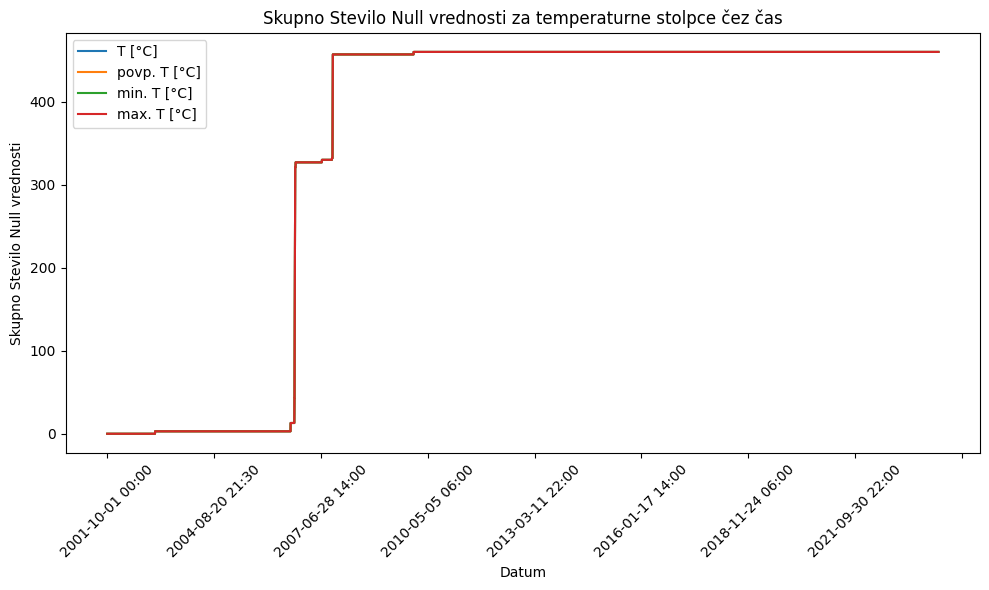

In [176]:
plt.figure(figsize=(10, 6))

for col in temp_stolpci:
    temp_df[col].isna().cumsum().plot(label=col)

plt.xlabel('Datum')
plt.ylabel('Skupno Stevilo Null vrednosti')
plt.title('Skupno Stevilo Null vrednosti za temperaturne stolpce čez čas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

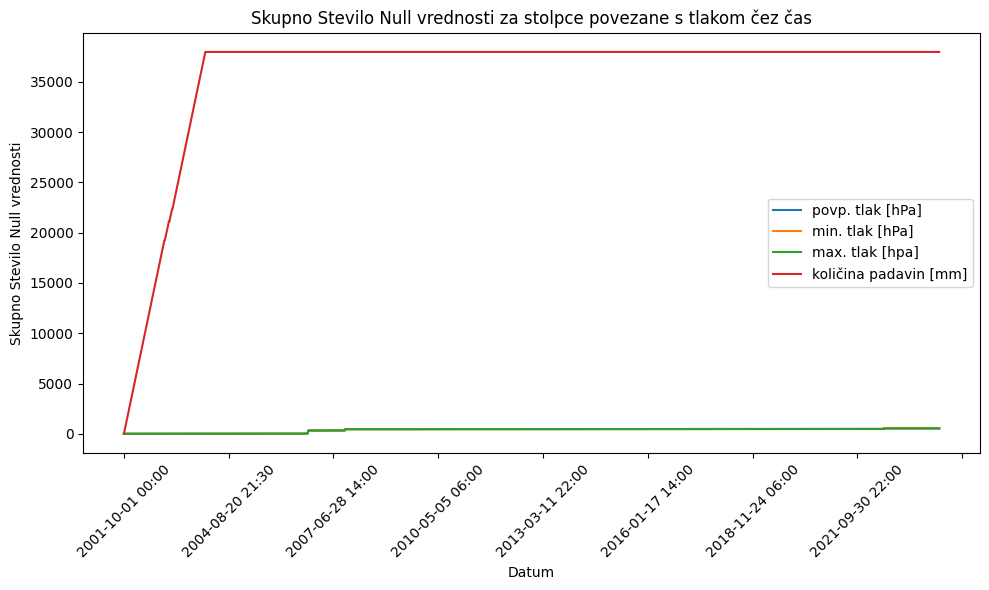

In [177]:
plt.figure(figsize=(10, 6))

for col in tlak_stolpci:
    tlak_df[col].isna().cumsum().plot(label=col)

plt.xlabel('Datum')
plt.ylabel('Skupno Stevilo Null vrednosti')
plt.title('Skupno Stevilo Null vrednosti za stolpce povezane s tlakom čez čas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

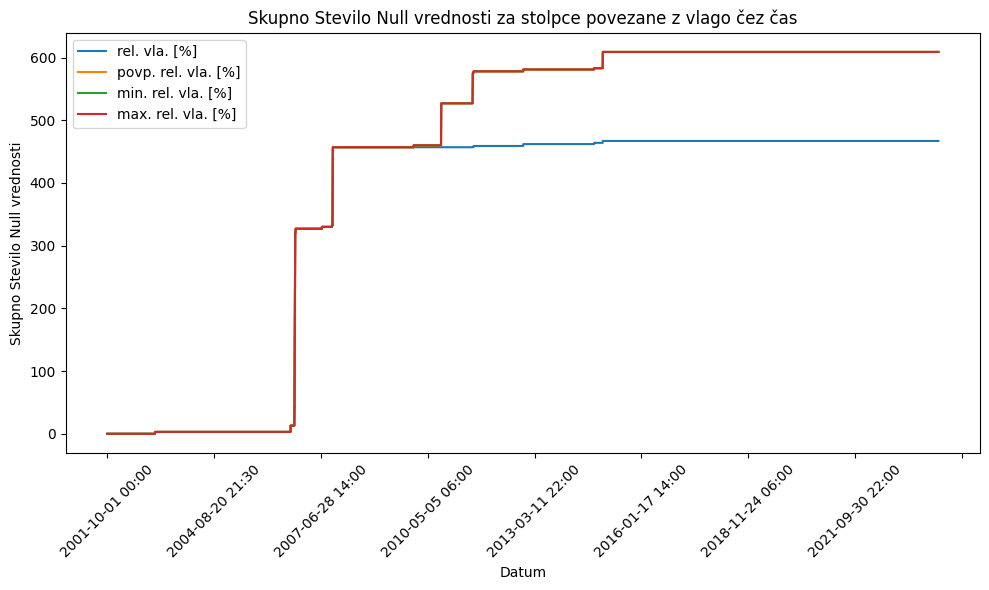

In [178]:
plt.figure(figsize=(10, 6))

for col in vlaga_stolpci:
    vlaga_df[col].isna().cumsum().plot(label=col)

plt.xlabel('Datum')
plt.ylabel('Skupno Stevilo Null vrednosti')
plt.title('Skupno Stevilo Null vrednosti za stolpce povezane z vlago čez čas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

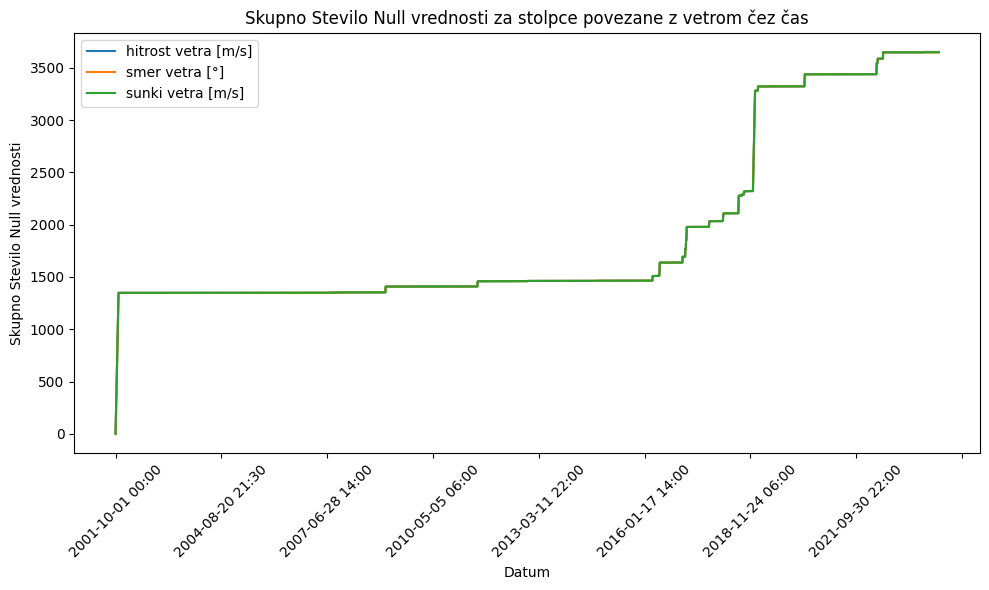

In [179]:
plt.figure(figsize=(10, 6))

for col in veter_stolpci:
    veter_df[col].isna().cumsum().plot(label=col)

plt.xlabel('Datum')
plt.ylabel('Skupno Stevilo Null vrednosti')
plt.title('Skupno Stevilo Null vrednosti za stolpce povezane z vetrom čez čas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

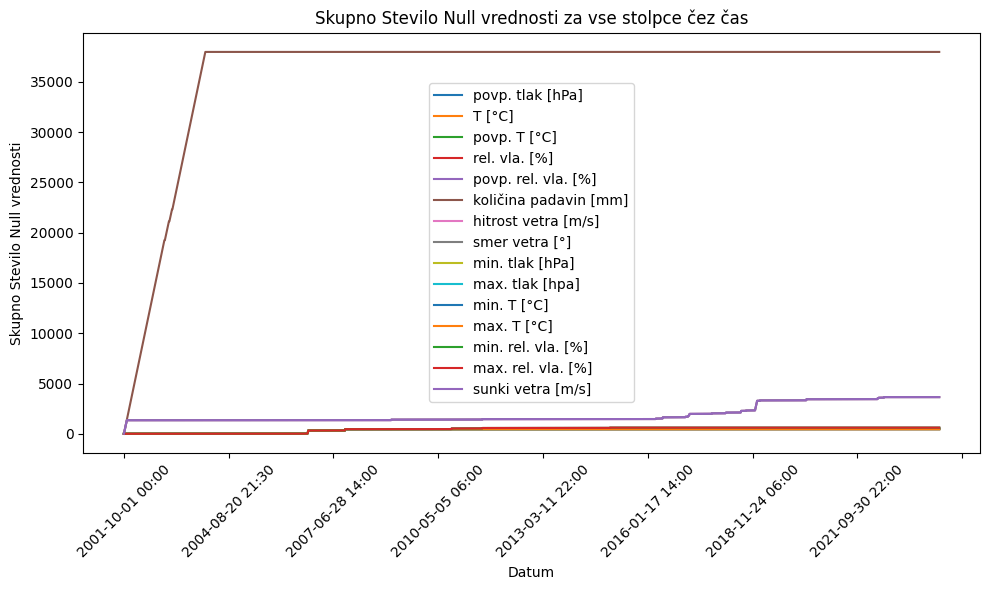

In [180]:
plt.figure(figsize=(10, 6))

nan_counts = df.isna().sum(axis=0)

for col in df.columns.tolist():
    df[col].isna().cumsum().plot(label=col)

plt.xlabel('Datum')
plt.ylabel('Skupno Stevilo Null vrednosti')
plt.title('Skupno Stevilo Null vrednosti za vse stolpce čez čas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Odstranjevanje vrstic z Null količino padavin
Na grafu se vidi, da se beleženje padavin ni začelo takoj. Zato sem odstranil en del množice. Po tem popravku imam točno 20 let zapisov

In [ ]:
df.reset_index(inplace=True)
df = df.iloc[38252:]
df.set_index("date", inplace=True, drop=True)

C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


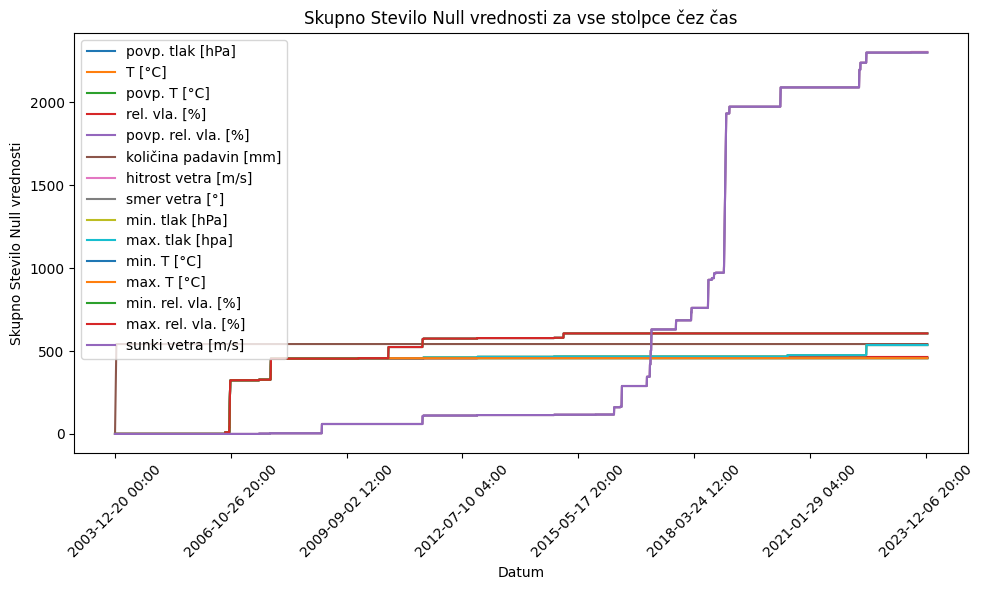

In [181]:
plt.figure(figsize=(10, 6))

nan_counts = df.isna().sum(axis=0)

for col in df.columns.tolist():
    df[col].isna().cumsum().plot(label=col)

plt.xlabel('Datum')
plt.ylabel('Skupno Stevilo Null vrednosti')
plt.title('Skupno Stevilo Null vrednosti za vse stolpce čez čas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [183]:
print(df.isna().any(axis=1).sum())
df.head()

3401


povp. tlak [hPa]  T [°C]  povp. T [°C]  rel. vla. [%]  \
date                                                                      
2003-12-20 00:00            992.62   -2.17         -1.92          90.25   
2003-12-20 00:30            992.75   -2.52         -2.25          91.17   
2003-12-20 01:00            992.88   -2.86         -2.58          92.08   
2003-12-20 01:30            993.00   -3.20         -2.90          93.00   
2003-12-20 02:00            993.00   -3.20         -3.20          93.00   

                  povp. rel. vla. [%]  količina padavin [mm]  \
date                                                           
2003-12-20 00:00                90.62                    NaN   
2003-12-20 00:30                91.75                    NaN   
2003-12-20 01:00                92.88                    NaN   
2003-12-20 01:30                94.00                    NaN   
2003-12-20 02:00                94.00                    NaN   

                  hitrost vetra [m/s]  smer vetra [°]  min. tlak [hPa]  \
date                                                                     
2003-12-20 00:00                  1.0           359.0           992.62   
2003-12-20 00:30                  0.5           319.0           992.75   
2003-12-20 01:00                  0.7           253.0           992.88   
2003-12-20 01:30                  0.5           163.0           993.00   
2003-12-20 02:00                  0.6           127.0           993.00   

                  max. tlak [hpa]  min. T [°C]  max. T [°C]  \
date                                                          
2003-12-20 00:00           992.62        -2.20        -1.74   
2003-12-20 00:30           992.75        -2.53        -2.06   
2003-12-20 01:00           992.88        -2.87        -2.38   
2003-12-20 01:30           993.00        -3.20        -2.70   
2003-12-20 02:00           993.00        -3.20        -3.10   

                  min. rel. vla. [%]  max. rel. vla. [%]  sunki vetra [m/s]  
date                                                                         
2003-12-20 00:00               89.38                92.0                1.5  
2003-12-20 00:30               90.58                93.0                1.0  
2003-12-20 01:00               91.79                94.0                1.0  
2003-12-20 01:30               93.00                95.0                1.1  
2003-12-20 02:00               93.00                94.0                1.1

# Odstranjevanje zadnjih NaN vrednosti
## Temperatura in Vlaga
S pomočjo "time-based imputation", ki grupira glede na uro, dan in mesec ter izračuna povprečje le teh.

## Tlak
Povprečje vseh stolpcev

## Veter in Padavine
Manjkajoče imajo vrednost 0

In [184]:
df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['date'])

for col in temp_stolpci:
    df[col] = df.groupby([df['date'].dt.month, df['date'].dt.day, df['date'].dt.hour])[col].transform(lambda x: x.fillna(round(x.mean(), 2)))

try:
    tlak_stolpci.remove("količina padavin [mm]")
except:
    pass

for col in tlak_stolpci:
    df[col] = df[col].fillna(round(df[col].mean(), 2))

for col in vlaga_stolpci:
    df[col] = df.groupby([df['date'].dt.month, df['date'].dt.day, df['date'].dt.hour])[col].transform(lambda x: x.fillna(round(x.mean(), 2)))

for col in veter_stolpci:
    df[col] = df[col].fillna(0)

df["količina padavin [mm]"] = df['količina padavin [mm]'].fillna(0)

try:
    df.set_index("date", inplace=True, drop=True)
    df.drop(columns=["index"], inplace=True)
except:
    pass

df.to_csv("podatki_vreme_skupni.csv", sep=",", decimal=".", encoding="utf-8")

In [185]:
df = pd.read_csv("podatki_vreme_skupni.csv", sep=",", decimal=".", encoding="utf-8", index_col=0)

print(df.isna().any(axis=1).sum())
df.head()

0


povp. tlak [hPa]  T [°C]  povp. T [°C]  rel. vla. [%]  \
date                                                                         
2003-12-20 00:00:00            992.62   -2.17         -1.92          90.25   
2003-12-20 00:30:00            992.75   -2.52         -2.25          91.17   
2003-12-20 01:00:00            992.88   -2.86         -2.58          92.08   
2003-12-20 01:30:00            993.00   -3.20         -2.90          93.00   
2003-12-20 02:00:00            993.00   -3.20         -3.20          93.00   

                     povp. rel. vla. [%]  količina padavin [mm]  \
date                                                              
2003-12-20 00:00:00                90.62                    0.0   
2003-12-20 00:30:00                91.75                    0.0   
2003-12-20 01:00:00                92.88                    0.0   
2003-12-20 01:30:00                94.00                    0.0   
2003-12-20 02:00:00                94.00                    0.0   

                     hitrost vetra [m/s]  smer vetra [°]  min. tlak [hPa]  \
date                                                                        
2003-12-20 00:00:00                  1.0           359.0           992.62   
2003-12-20 00:30:00                  0.5           319.0           992.75   
2003-12-20 01:00:00                  0.7           253.0           992.88   
2003-12-20 01:30:00                  0.5           163.0           993.00   
2003-12-20 02:00:00                  0.6           127.0           993.00   

                     max. tlak [hpa]  min. T [°C]  max. T [°C]  \
date                                                             
2003-12-20 00:00:00           992.62        -2.20        -1.74   
2003-12-20 00:30:00           992.75        -2.53        -2.06   
2003-12-20 01:00:00           992.88        -2.87        -2.38   
2003-12-20 01:30:00           993.00        -3.20        -2.70   
2003-12-20 02:00:00           993.00        -3.20        -3.10   

                     min. rel. vla. [%]  max. rel. vla. [%]  sunki vetra [m/s]  
date                                                                            
2003-12-20 00:00:00               89.38                92.0                1.5  
2003-12-20 00:30:00               90.58                93.0                1.0  
2003-12-20 01:00:00               91.79                94.0                1.0  
2003-12-20 01:30:00               93.00                95.0                1.1  
2003-12-20 02:00:00               93.00                94.0                1.1

In [186]:
scaler = StandardScaler()
stolpci = [col for col in df.columns if col not in temp_stolpci]
df[stolpci] = scaler.fit_transform(df[stolpci])

df.head()

povp. tlak [hPa]  T [°C]  povp. T [°C]  rel. vla. [%]  \
date                                                                         
2003-12-20 00:00:00          0.893685   -2.17         -1.92       0.798680   
2003-12-20 00:30:00          0.910228   -2.52         -2.25       0.848119   
2003-12-20 01:00:00          0.926770   -2.86         -2.58       0.897021   
2003-12-20 01:30:00          0.942039   -3.20         -2.90       0.946460   
2003-12-20 02:00:00          0.942039   -3.20         -3.20       0.946460   

                     povp. rel. vla. [%]  količina padavin [mm]  \
date                                                              
2003-12-20 00:00:00             0.824056              -0.137281   
2003-12-20 00:30:00             0.885571              -0.137281   
2003-12-20 01:00:00             0.947086              -0.137281   
2003-12-20 01:30:00             1.008056              -0.137281   
2003-12-20 02:00:00             1.008056              -0.137281   

                     hitrost vetra [m/s]  smer vetra [°]  min. tlak [hPa]  \
date                                                                        
2003-12-20 00:00:00            -0.730536        1.616711         0.906993   
2003-12-20 00:30:00            -1.006249        1.258384         0.923434   
2003-12-20 01:00:00            -0.895964        0.667144         0.939876   
2003-12-20 01:30:00            -1.006249       -0.139093         0.955053   
2003-12-20 02:00:00            -0.951106       -0.461588         0.955053   

                     max. tlak [hpa]  min. T [°C]  max. T [°C]  \
date                                                             
2003-12-20 00:00:00         0.869024        -2.20        -1.74   
2003-12-20 00:30:00         0.885463        -2.53        -2.06   
2003-12-20 01:00:00         0.901901        -2.87        -2.38   
2003-12-20 01:30:00         0.917075        -3.20        -2.70   
2003-12-20 02:00:00         0.917075        -3.20        -3.10   

                     min. rel. vla. [%]  max. rel. vla. [%]  sunki vetra [m/s]  
date                                                                            
2003-12-20 00:00:00            0.850876            0.806953          -0.874788  
2003-12-20 00:30:00            0.913913            0.864258          -1.047436  
2003-12-20 01:00:00            0.977475            0.921564          -1.047436  
2003-12-20 01:30:00            1.041037            0.978869          -1.012907  
2003-12-20 02:00:00            1.041037            0.921564          -1.012907

# Učenje
## Linearna regresija
To je osnovni regresijski model, ki poskuša najti linearno razmerje med neodvisnimi spremenljivkami (značilnostmi) in odvisno spremenljivko (ciljno spremenljivko)

### Regresijsko drevo
Ta model uporablja drevesno strukturo za predstavitev odločitev in njihovih možnih posledic, vključno z rezultati, stroški in verjetnostjo vsake odločitve. V kontekstu regresije regresijska drevesa delijo vhodni prostor na različne regije in za vsako regijo določijo izhodno vrednost (običajno povprečje ciljnih vrednosti v tej regiji).

### Regresor naključnega gozda
Naključni gozd je ansambelski model, ki združuje več regresijskih dreves. Vsako drevo se uči na naključnem vzorcu podatkov in značilnosti. Končna napoved je povprečje napovedi posameznih dreves. Model je običajno močnejši in bolj robusten kot posamezno regresijsko drevo, saj ansambelska metoda pomaga zmanjšati problem prekomernega prileganja.

In [187]:
features = ["povp. tlak [hPa]", "rel. vla. [%]", "povp. rel. vla. [%]","količina padavin [mm]","hitrost vetra [m/s]","smer vetra [°]","min. tlak [hPa]","max. tlak [hpa]","min. rel. vla. [%]","max. rel. vla. [%]","sunki vetra [m/s]"]

vhod = df[features]
izhod = df['T [°C]']

X_train, X_test, y_train, y_test = train_test_split(vhod, izhod, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"r2 score: {r2}, mse: {mse}")

napovedane_vse_lr = lr.predict(vhod)

r2 score: 0.30922823832165725, mse: 56.47618738638741


In [188]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

predictions = dtr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"r2 score: {r2}, mse: {mse}")

napovedane_vse_dtr = dtr.predict(vhod)

r2 score: -0.025774283561117217, mse: 83.86535737039993


In [189]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

predictions = rfr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"r2 score: {r2}, mse: {mse}")

napovedane_vse_rfr = rfr.predict(vhod)

r2 score: 0.482742741802068, mse: 42.2899711041724


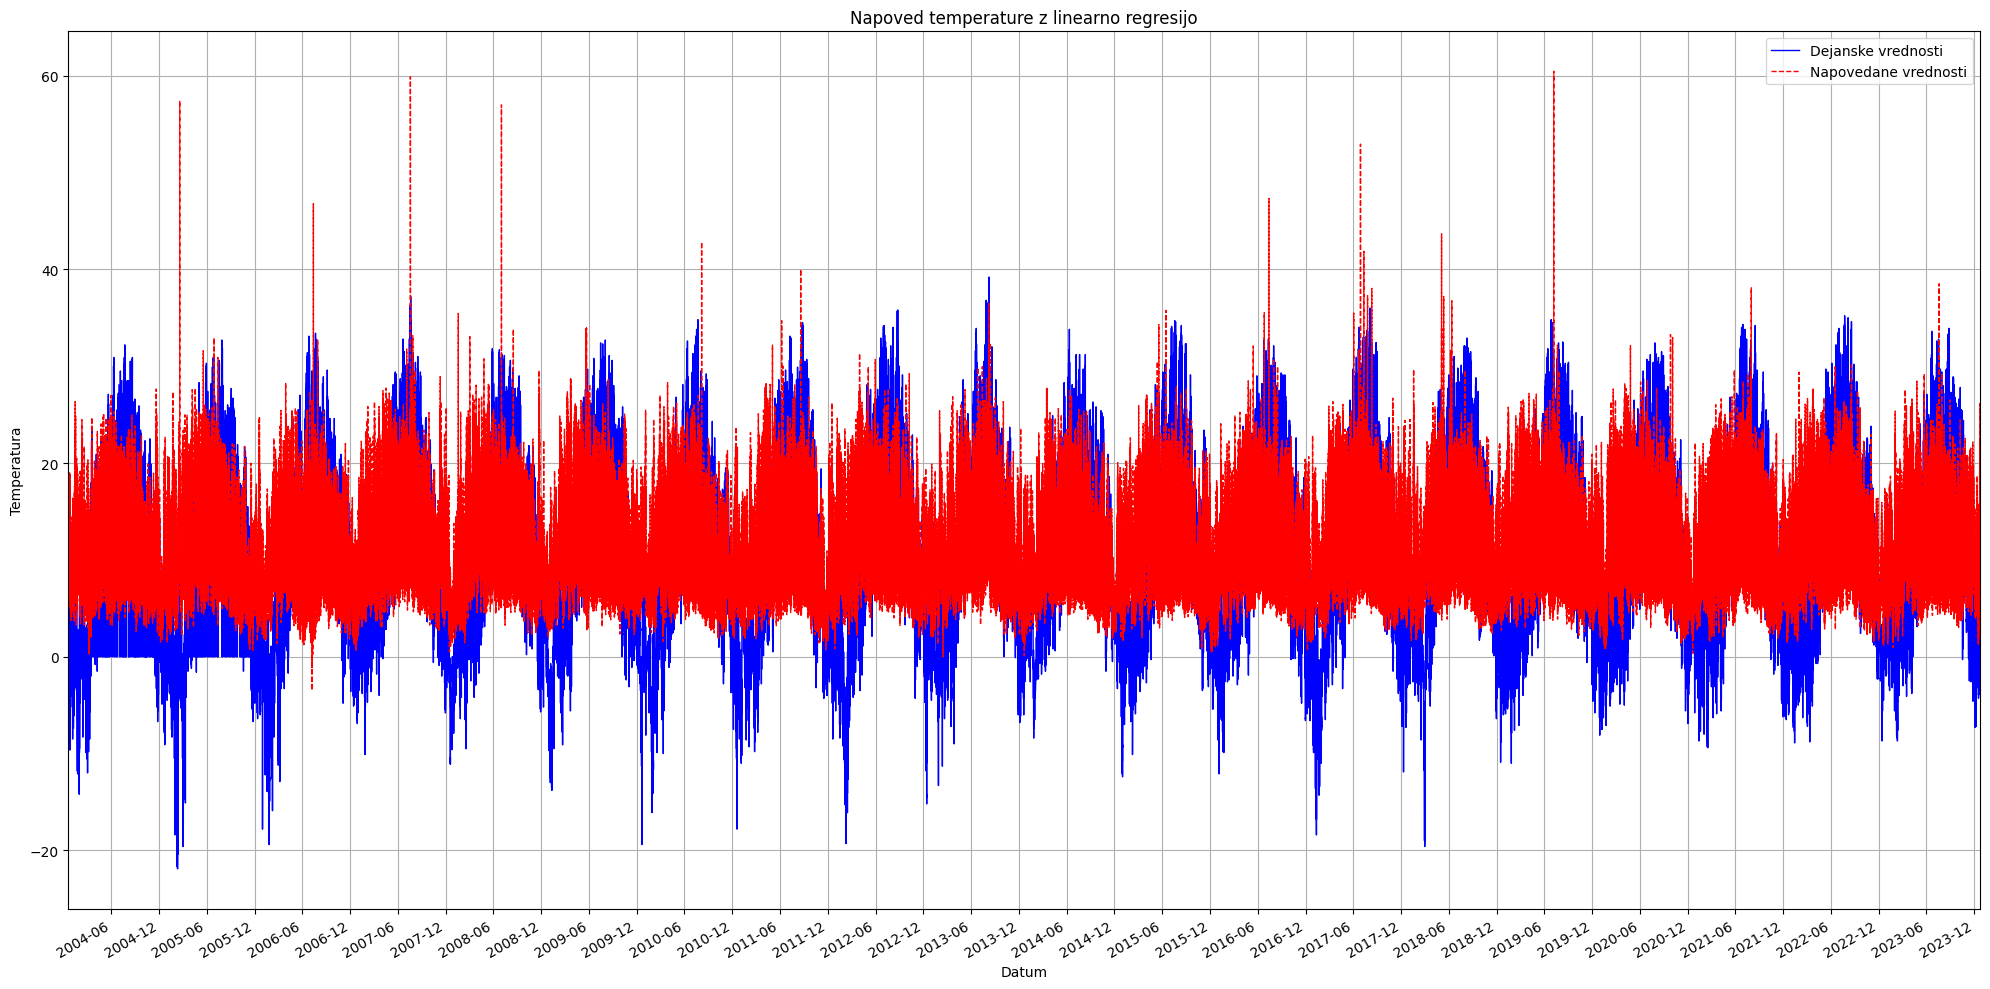

In [190]:
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(20, 10))

plt.plot(df.index, df['T [°C]'], label='Dejanske vrednosti', color='blue', linewidth=1)
plt.plot(df.index, napovedane_vse_lr, label='Napovedane vrednosti', color='red', linewidth=1, linestyle='dashed')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.gcf().autofmt_xdate()
plt.xlim(df.index.min(), df.index.max())

plt.title('Napoved temperature z linearno regresijo')
plt.xlabel('Datum')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

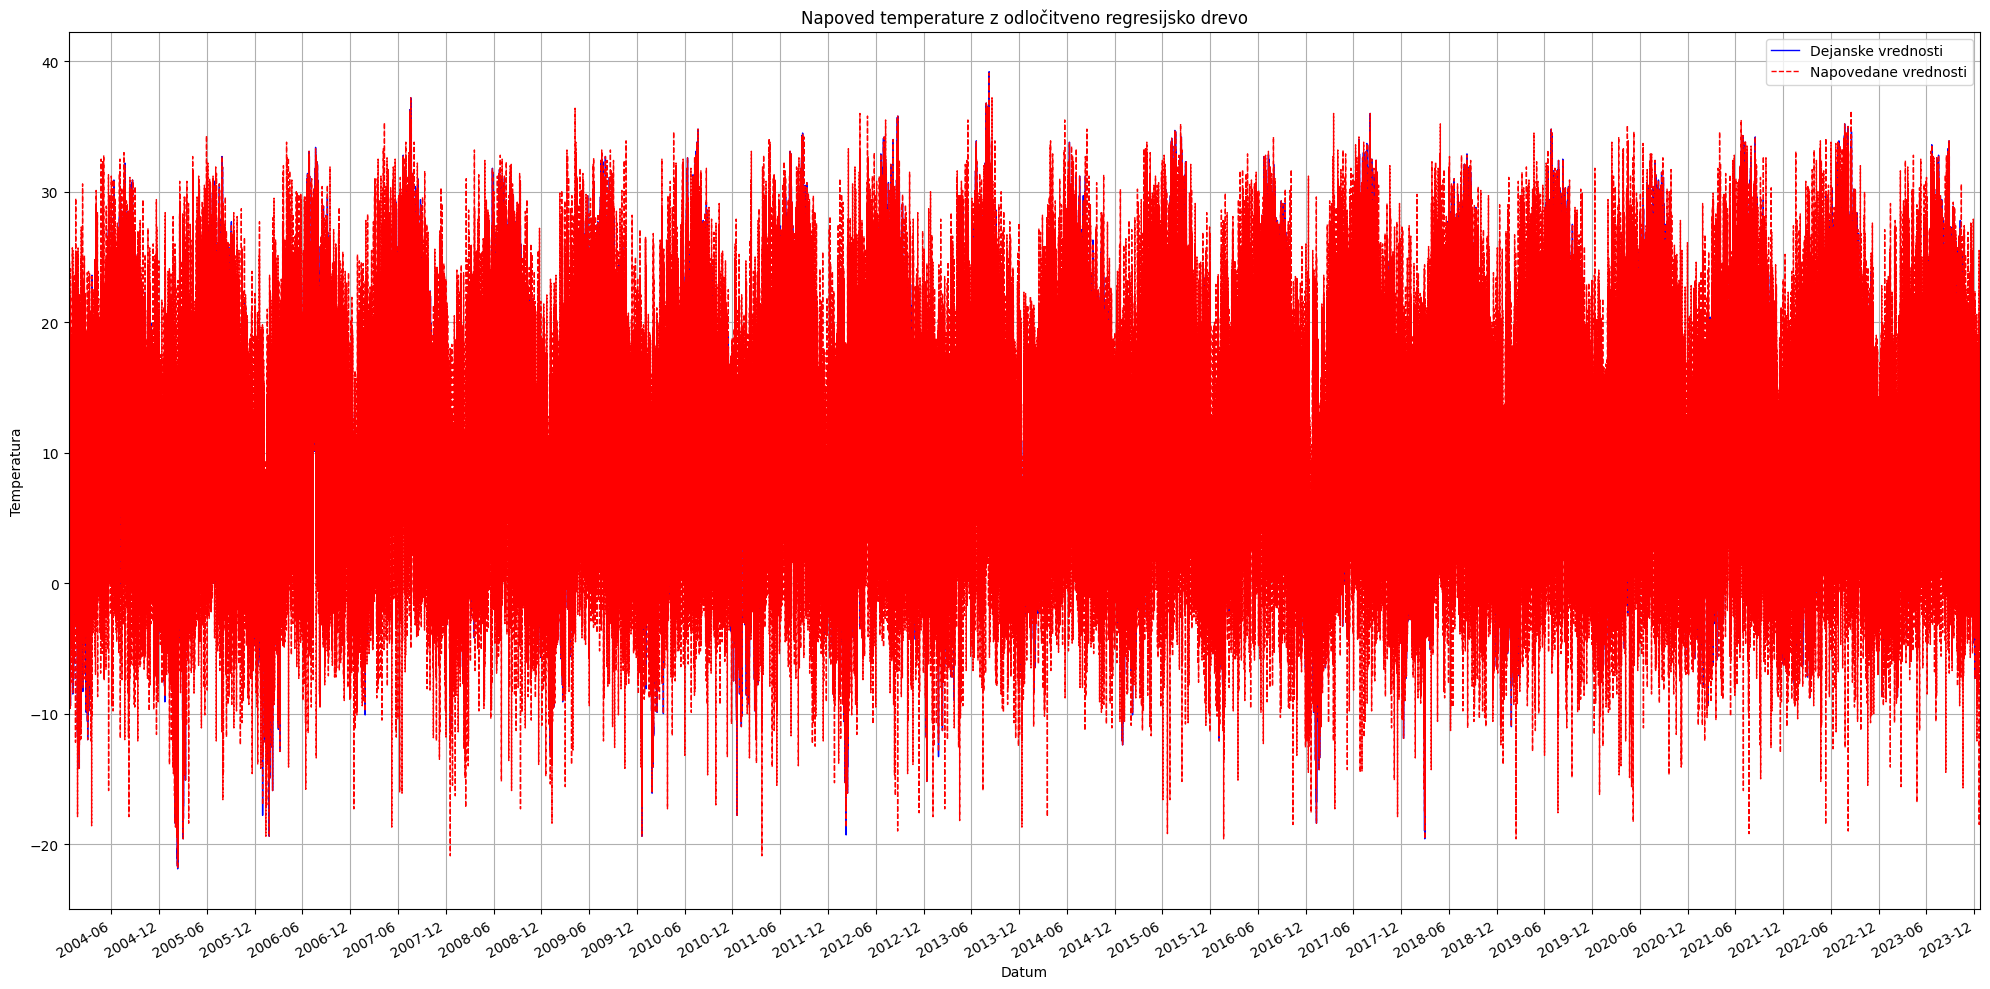

In [191]:
plt.figure(figsize=(20, 10))

plt.plot(df.index, df['T [°C]'], label='Dejanske vrednosti', color='blue', linewidth=1)
plt.plot(df.index, napovedane_vse_dtr, label='Napovedane vrednosti', color='red', linewidth=1, linestyle='dashed')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.gcf().autofmt_xdate()
plt.xlim(df.index.min(), df.index.max())

plt.title('Napoved temperature z odločitveno regresijsko drevo')
plt.xlabel('Datum')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

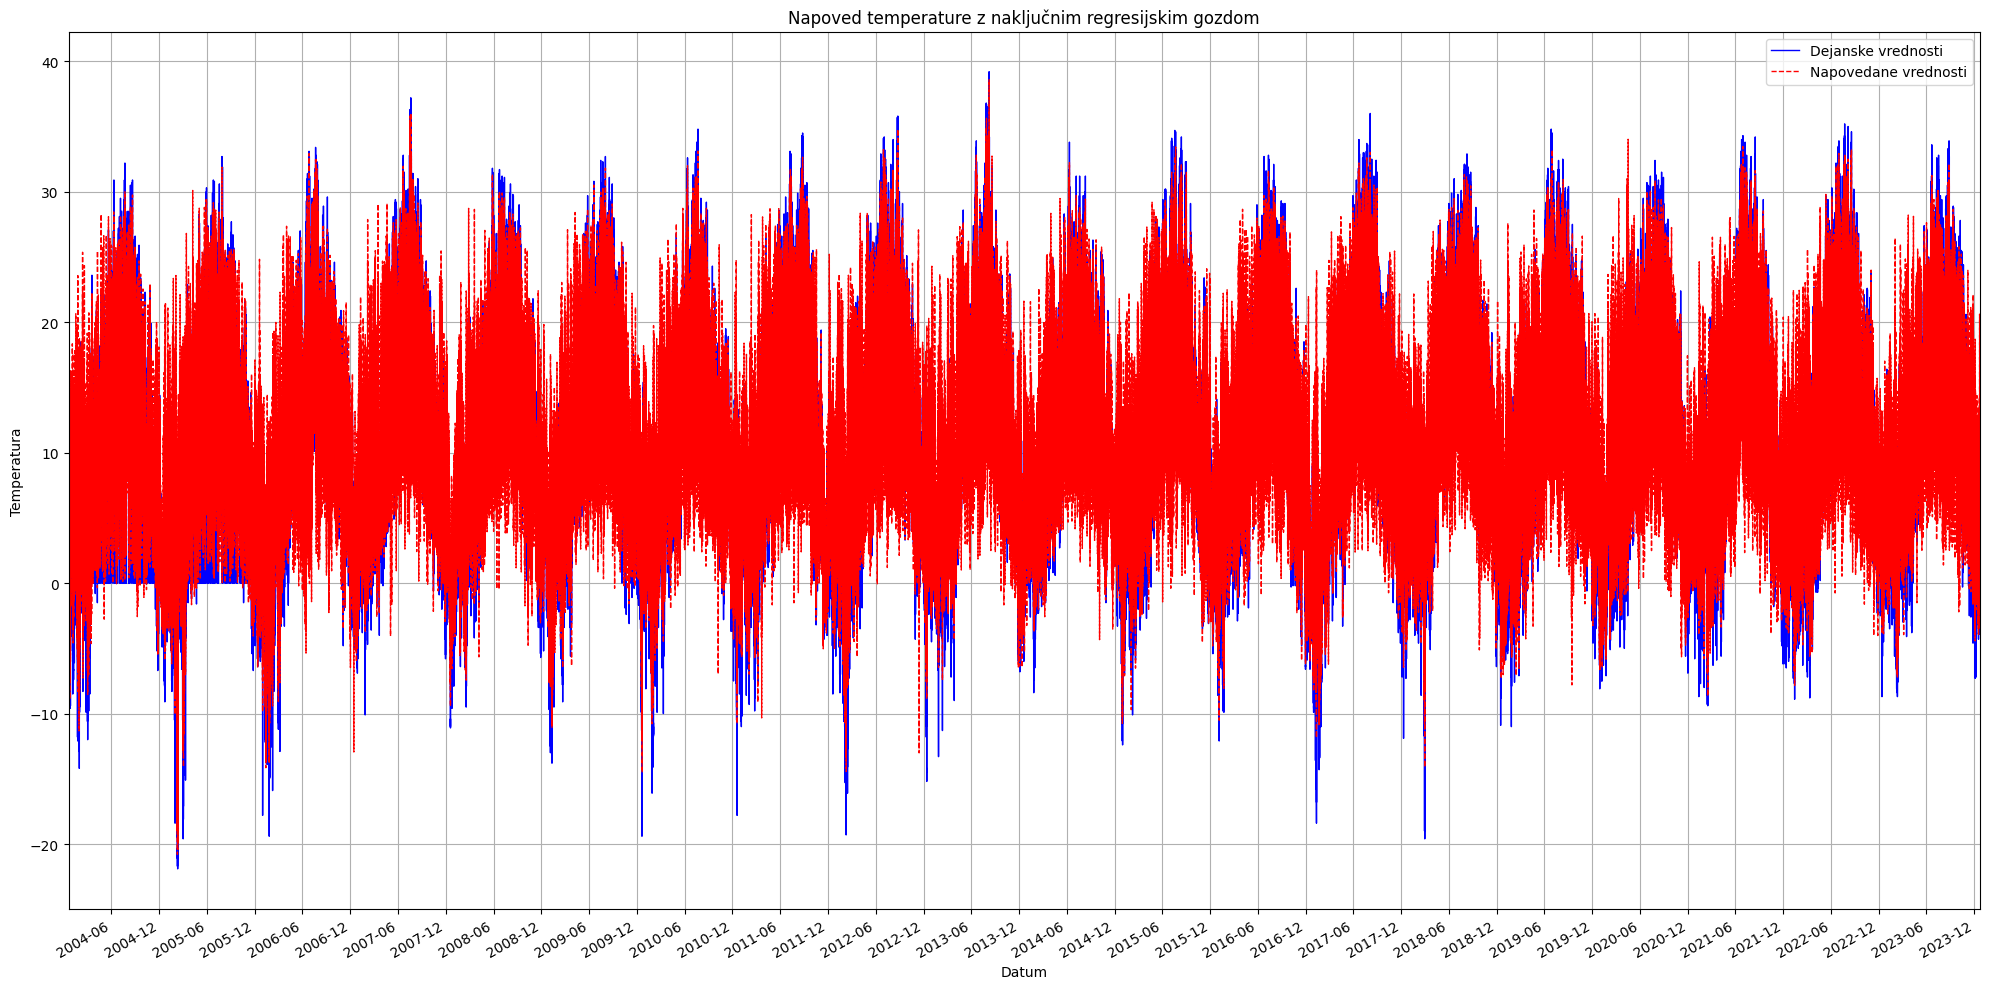

In [192]:
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(20, 10))

plt.plot(df.index, df['T [°C]'], label='Dejanske vrednosti', color='blue', linewidth=1)
plt.plot(df.index, napovedane_vse_rfr, label='Napovedane vrednosti', color='red', linewidth=1, linestyle='dashed')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.gcf().autofmt_xdate()
plt.xlim(df.index.min(), df.index.max())

plt.title('Napoved temperature z naključnim regresijskim gozdom')
plt.xlabel('Datum')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Priprava podatkov drugič
Spremenil sem podatkovno množico da bo vsebovala le podatke o temperaturi. Predvideval bom temperaturo glede na n-prejšnih. 
## Združevanje intervalov
Združil sem podatke v tri podatkovno množice, ki se razlikujejo po dolžini intervala. Temperatura je povprečje vseh v tem intervalu
- šest urni intervali
- dvanajst urni intervali
- štiriindvajset urni intervali
## Zamik stolpcev za temperaturo prejšnih dni
Vsaki podatkovni množici bom dodal toliko stolpcev koliko je potrebno da upošteva podatke iz enega leta. Torej ko bo napovedoval model za nek dan, bo model imel podatke za 365 dni nazaj.
- šest urni intervali -> 1460 stolpcev
- dvanajst urni intervali -> 730 stolpcev
- štiriindvajset urni intervali -> 365 stolpcev

In [209]:
df_temp = df[['T [°C]']].copy()
df_temp.rename(columns={'T [°C]': 'Temp'}, inplace=True)

df_temp.index = pd.to_datetime(df_temp.index)

stvari_za_graf = []

In [210]:
df_6h = df_temp.resample('6h').mean()
n_6h = 1460

print(df_6h.isnull().sum())
print(df_6h.shape)
df_6h.head(3)

Temp    0
dtype: int64
(29232, 1)


Temp
date                         
2003-12-20 00:00:00 -2.733333
2003-12-20 06:00:00  1.330000
2003-12-20 12:00:00  5.508333

In [211]:
for i in range(1, n_6h + 1):
    df_6h[f'Temp_{i}d'] = df_6h['Temp'].shift(i)

df_6h = df_6h.dropna()
X = df_6h.drop('Temp', axis=1)
y = df_6h['Temp']
df_6h.head(1)

C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\3749484960.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_6h[f'Temp_{i}d'] = df_6h['Temp'].shift(i)
C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\3749484960.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_6h[f'Temp_{i}d'] = df_6h['Temp'].shift(i)
C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\3749484960.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.

Temp   Temp_1d   Temp_2d  Temp_3d   Temp_4d   Temp_5d  \
date                                                                    
2004-12-19 -5.408333 -0.983333  1.666667   -0.175 -0.391667 -0.708333   

             Temp_6d  Temp_7d  Temp_8d   Temp_9d  ...  Temp_1451d  Temp_1452d  \
date                                              ...                           
2004-12-19 -0.906667   -1.575   -2.425 -2.933333  ...      1.7325    2.874167   

            Temp_1453d  Temp_1454d  Temp_1455d  Temp_1456d  Temp_1457d  \
date                                                                     
2004-12-19    5.858333    9.208333    7.718182    3.818182   -1.241667   

            Temp_1458d  Temp_1459d  Temp_1460d  
date                                            
2004-12-19    5.508333        1.33   -2.733333  

[1 rows x 1461 columns]

In [212]:
df_6h.shape

(27772, 1461)

Za shranjevanje napovedi se inicializira seznam z imenom `y_pred`, za shranjevanje zadnjih `n_6h` opazovanj iz ciljne spremenljivke `y_train` pa se ustvari seznam `last_n_values`.

Nato se uporabi zanka for za iteracijo vsakega elementa v spremenljivki `y_test` (ciljna spremenljivka testa):
    - Za vsako iteracijo se `last_n_values` preoblikujejo v 2D-polje `X_input`.
    - Model naredi napoved za `X_input`, ki se doda na seznam `y_pred`.
    - Najstarejša vrednost v seznamu `last_n_values` se odstrani, na seznam pa se doda nova napovedana vrednost.

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

y_pred = []
last_n_values = list(y_train[-n_6h:])

for i in range(len(y_test)):
    X_input = np.array(last_n_values).reshape(1, -1)
    pred = lr.predict(X_input)[0]
    y_pred.append(pred)
    
    last_n_values.pop(0)
    last_n_values.append(pred)

y_pred = np.array(y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"r2 score: {r2}, mse: {mse}")

stvari_za_graf.append({
    "index": df_6h.index,
    "dejanske": df_6h['Temp'],
    "napovedane": np.concatenate([y_train_pred, y_pred]),
    "min": df_6h.index.min(),
    "max": df_6h.index.max(),
    "y_train": y_train
})

C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages

r2 score: 0.3230475110183366, mse: 50.149768654872


In [198]:
df_12h = df_temp.resample('12h').mean()
n_12h = 730

print(df_12h.isnull().sum())
print(df_12h.shape)
df_12h.head(3)

Temp    0
dtype: int64
(14616, 1)


Temp
date                         
2003-12-20 00:00:00 -0.701667
2003-12-20 12:00:00  2.133333
2003-12-21 00:00:00  5.768182

In [199]:
for i in range(1, n_12h + 1):
    df_12h[f'Temp_{i}d'] = df_12h['Temp'].shift(i)

df_12h = df_12h.dropna()
X = df_12h.drop('Temp', axis=1)
y = df_12h['Temp']
df_12h.head(1)

C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\1247796577.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_12h[f'Temp_{i}d'] = df_12h['Temp'].shift(i)
C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\1247796577.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_12h[f'Temp_{i}d'] = df_12h['Temp'].shift(i)
C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\1247796577.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performa

Temp   Temp_1d   Temp_2d  Temp_3d  Temp_4d   Temp_5d   Temp_6d  \
date                                                                          
2004-12-19 -4.375  0.341667 -0.283333  -0.8075     -2.0 -3.029167 -3.869583   

            Temp_7d   Temp_8d   Temp_9d  ...  Temp_721d  Temp_722d  Temp_723d  \
date                                     ...                                    
2004-12-19  -3.3875 -3.291667 -2.841667  ...  -3.000833   -3.98875  -1.892917   

            Temp_724d  Temp_725d  Temp_726d  Temp_727d  Temp_728d  Temp_729d  \
date                                                                           
2004-12-19      0.825     1.9125   2.303333   7.533333   5.768182   2.133333   

            Temp_730d  
date                   
2004-12-19  -0.701667  

[1 rows x 731 columns]

In [200]:
df_12h.shape

(13886, 731)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

y_pred = []
last_n_values = list(y_train[-n_12h:])

for i in range(len(y_test)):
    X_input = np.array(last_n_values).reshape(1, -1)
    pred = lr.predict(X_input)[0]
    y_pred.append(pred)
    
    last_n_values.pop(0)
    last_n_values.append(pred)

y_pred = np.array(y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"r2 score: {r2}, mse: {mse}")

stvari_za_graf.append({
    "index": df_12h.index,
    "dejanske": df_12h['Temp'],
    "napovedane": np.concatenate([y_train_pred, y_pred]),
    "min": df_12h.index.min(),
    "max": df_12h.index.max()
})

C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages

r2 score: 0.6650589820042194, mse: 22.956138251997597


In [202]:
df_24h = df_temp.resample('24h').mean()
n_24h = 365

print(df_24h.isnull().sum())
print(df_24h.shape)
df_24h.head(3)

Temp    0
dtype: int64
(7308, 1)


Temp
date                
2003-12-20  0.715833
2003-12-21  6.689130
2003-12-22  2.107917

In [203]:
for i in range(1, n_24h + 1):
    df_24h[f'Temp_{i}d'] = df_24h['Temp'].shift(i)

df_24h = df_24h.dropna()
X = df_24h.drop('Temp', axis=1)
y = df_24h['Temp']
df_24h.head(1)

C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\796905044.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_24h[f'Temp_{i}d'] = df_24h['Temp'].shift(i)
C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\796905044.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_24h[f'Temp_{i}d'] = df_24h['Temp'].shift(i)
C:\Users\Vitomir\AppData\Local\Temp\ipykernel_10428\796905044.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

Temp   Temp_1d  Temp_2d   Temp_3d   Temp_4d   Temp_5d  \
date                                                                    
2004-12-19 -2.046458  0.029167 -1.40375 -3.449375 -3.339583 -2.941667   

            Temp_6d   Temp_7d   Temp_8d   Temp_9d  ...  Temp_356d  Temp_357d  \
date                                               ...                         
2004-12-19   -2.625 -3.301458 -0.920833 -0.373542  ...   5.314583   5.716667   

            Temp_358d  Temp_359d  Temp_360d  Temp_361d  Temp_362d  Temp_363d  \
date                                                                           
2004-12-19  -4.680833  -5.891667  -5.508333  -3.494792  -0.533958   2.107917   

            Temp_364d  Temp_365d  
date                              
2004-12-19    6.68913   0.715833  

[1 rows x 366 columns]

In [204]:
df_24h.shape

(6943, 366)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)

y_pred = []
last_n_values = list(y_train[-n_24h:])

for i in range(len(y_test)):
    X_input = np.array(last_n_values).reshape(1, -1)
    pred = lr.predict(X_input)[0]
    y_pred.append(pred)
    
    last_n_values.pop(0)
    last_n_values.append(pred)

y_pred = np.array(y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"r2 score: {r2}, mse: {mse}")

stvari_za_graf.append({
    "index": df_24h.index,
    "dejanske": df_24h['Temp'],
    "napovedane": np.concatenate([y_train_pred, y_pred]),
    "min": df_24h.index.min(),
    "max": df_24h.index.max()
})

r2 score: 0.6357661291611272, mse: 22.860771474237804


C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vitomir\TH_projekt\venv\Lib\site-packages

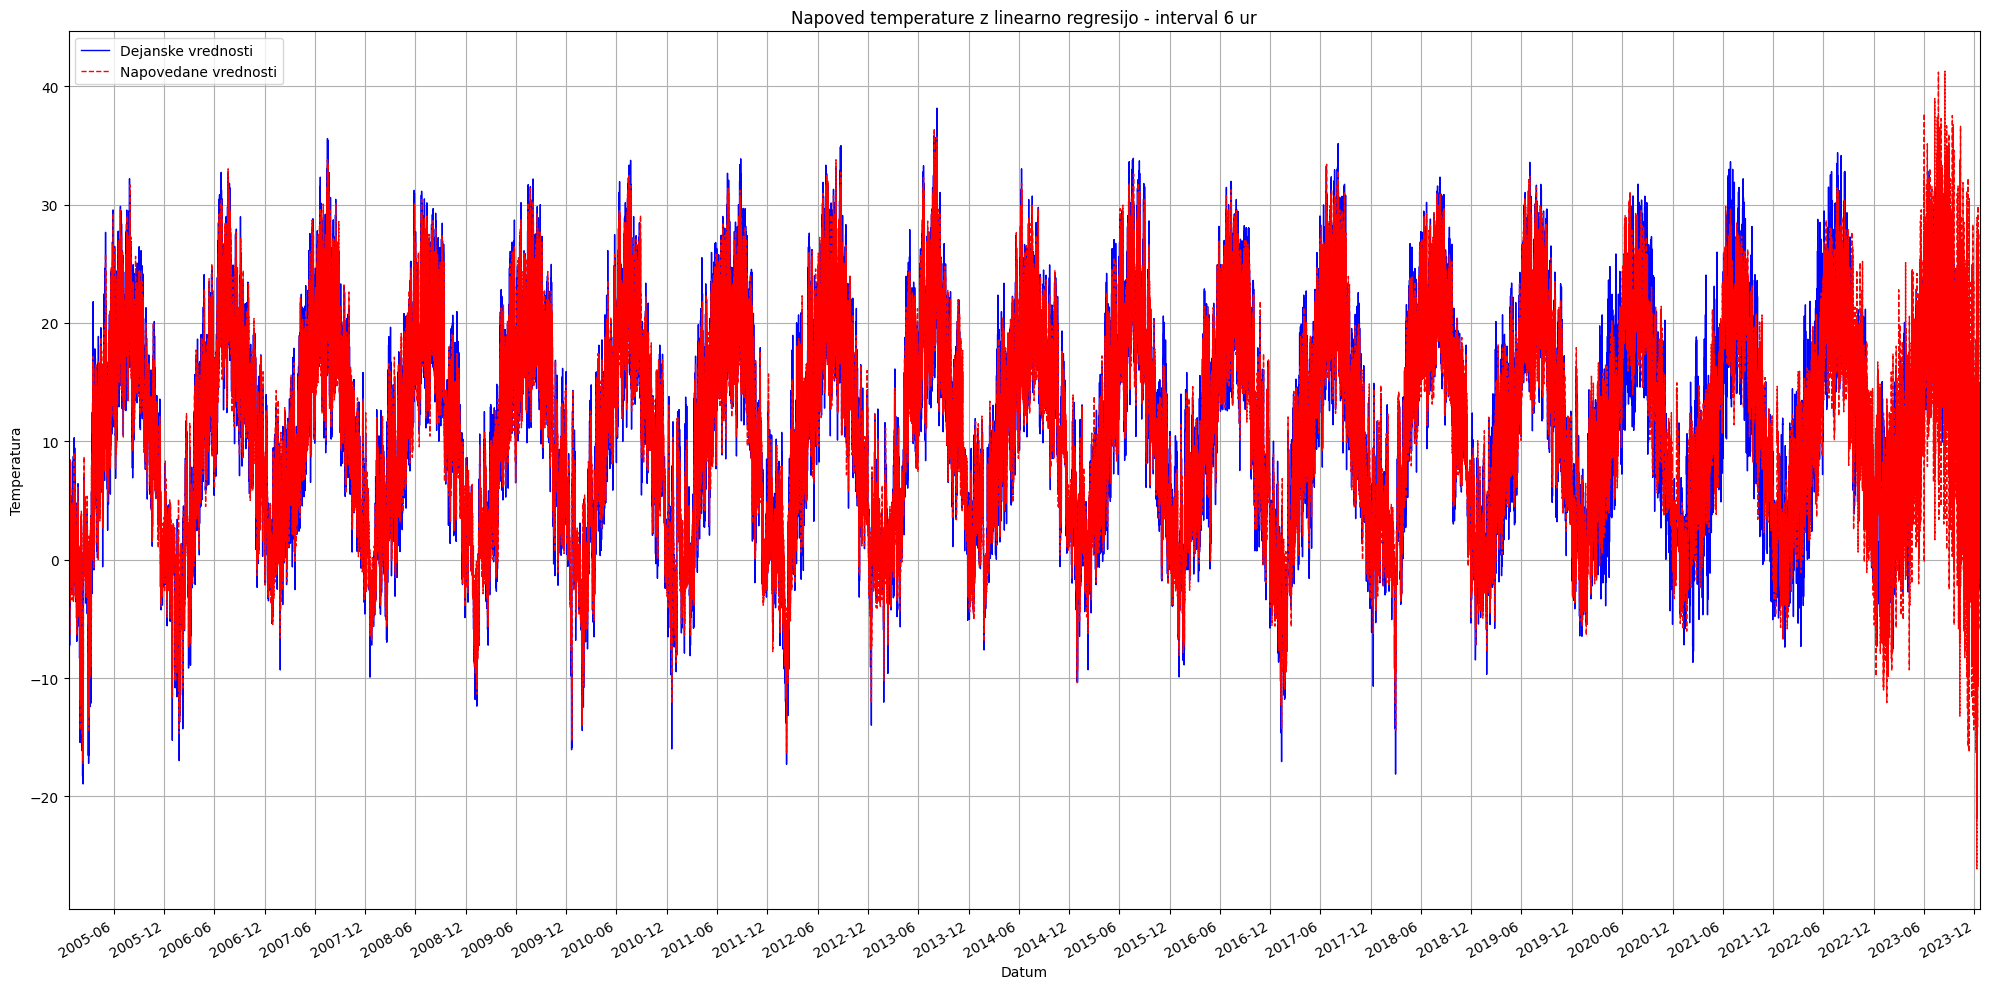

In [206]:
plt.figure(figsize=(20, 10))

plt.plot(stvari_za_graf[0]["index"], stvari_za_graf[0]["dejanske"], label='Dejanske vrednosti', color='blue', linewidth=1)
plt.plot(stvari_za_graf[0]["index"], stvari_za_graf[0]["napovedane"], label='Napovedane vrednosti', color='red', linewidth=1, linestyle='dashed')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.gcf().autofmt_xdate()
plt.xlim(stvari_za_graf[0]["min"], stvari_za_graf[0]["max"])

plt.title('Napoved temperature z linearno regresijo - interval 6 ur')
plt.xlabel('Datum')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

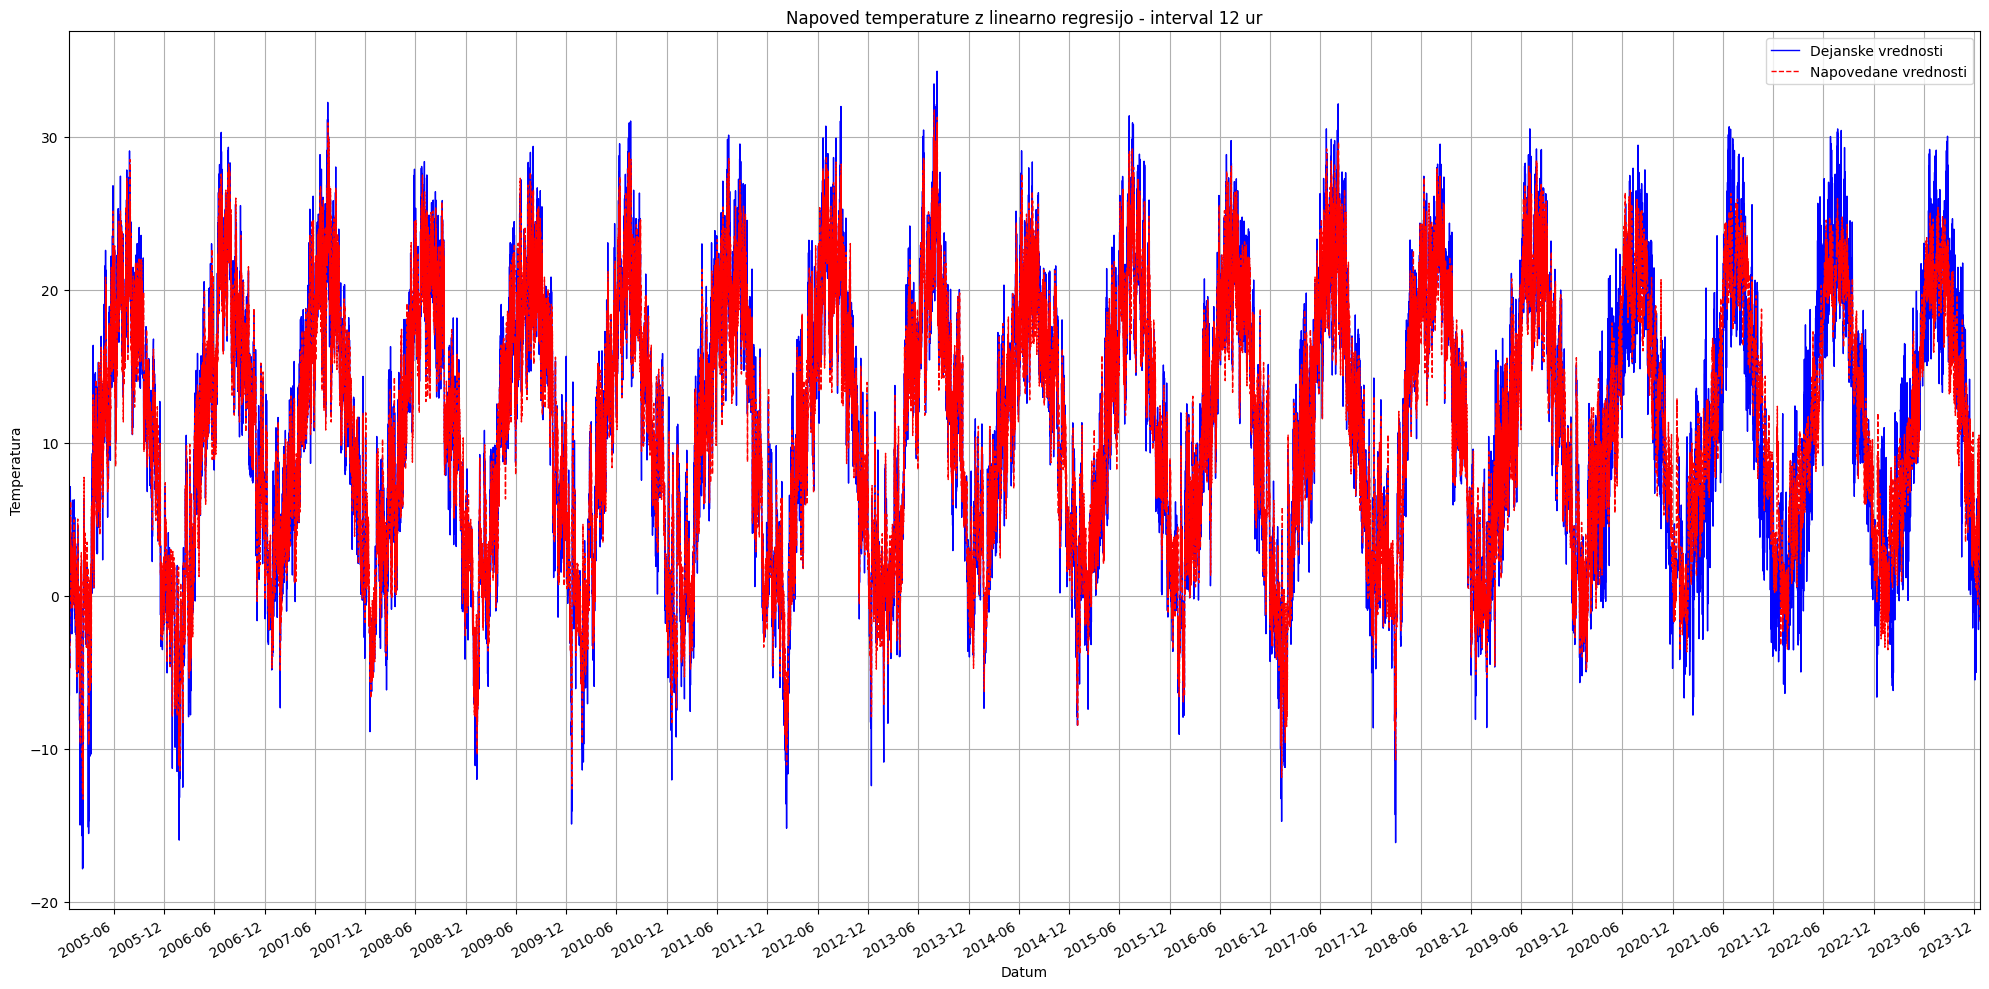

In [207]:
plt.figure(figsize=(20, 10))

plt.plot(stvari_za_graf[1]["index"], stvari_za_graf[1]["dejanske"], label='Dejanske vrednosti', color='blue', linewidth=1)
plt.plot(stvari_za_graf[1]["index"], stvari_za_graf[1]["napovedane"], label='Napovedane vrednosti', color='red', linewidth=1, linestyle='dashed')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.gcf().autofmt_xdate()
plt.xlim(stvari_za_graf[1]["min"], stvari_za_graf[1]["max"])

plt.title('Napoved temperature z linearno regresijo - interval 12 ur')
plt.xlabel('Datum')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

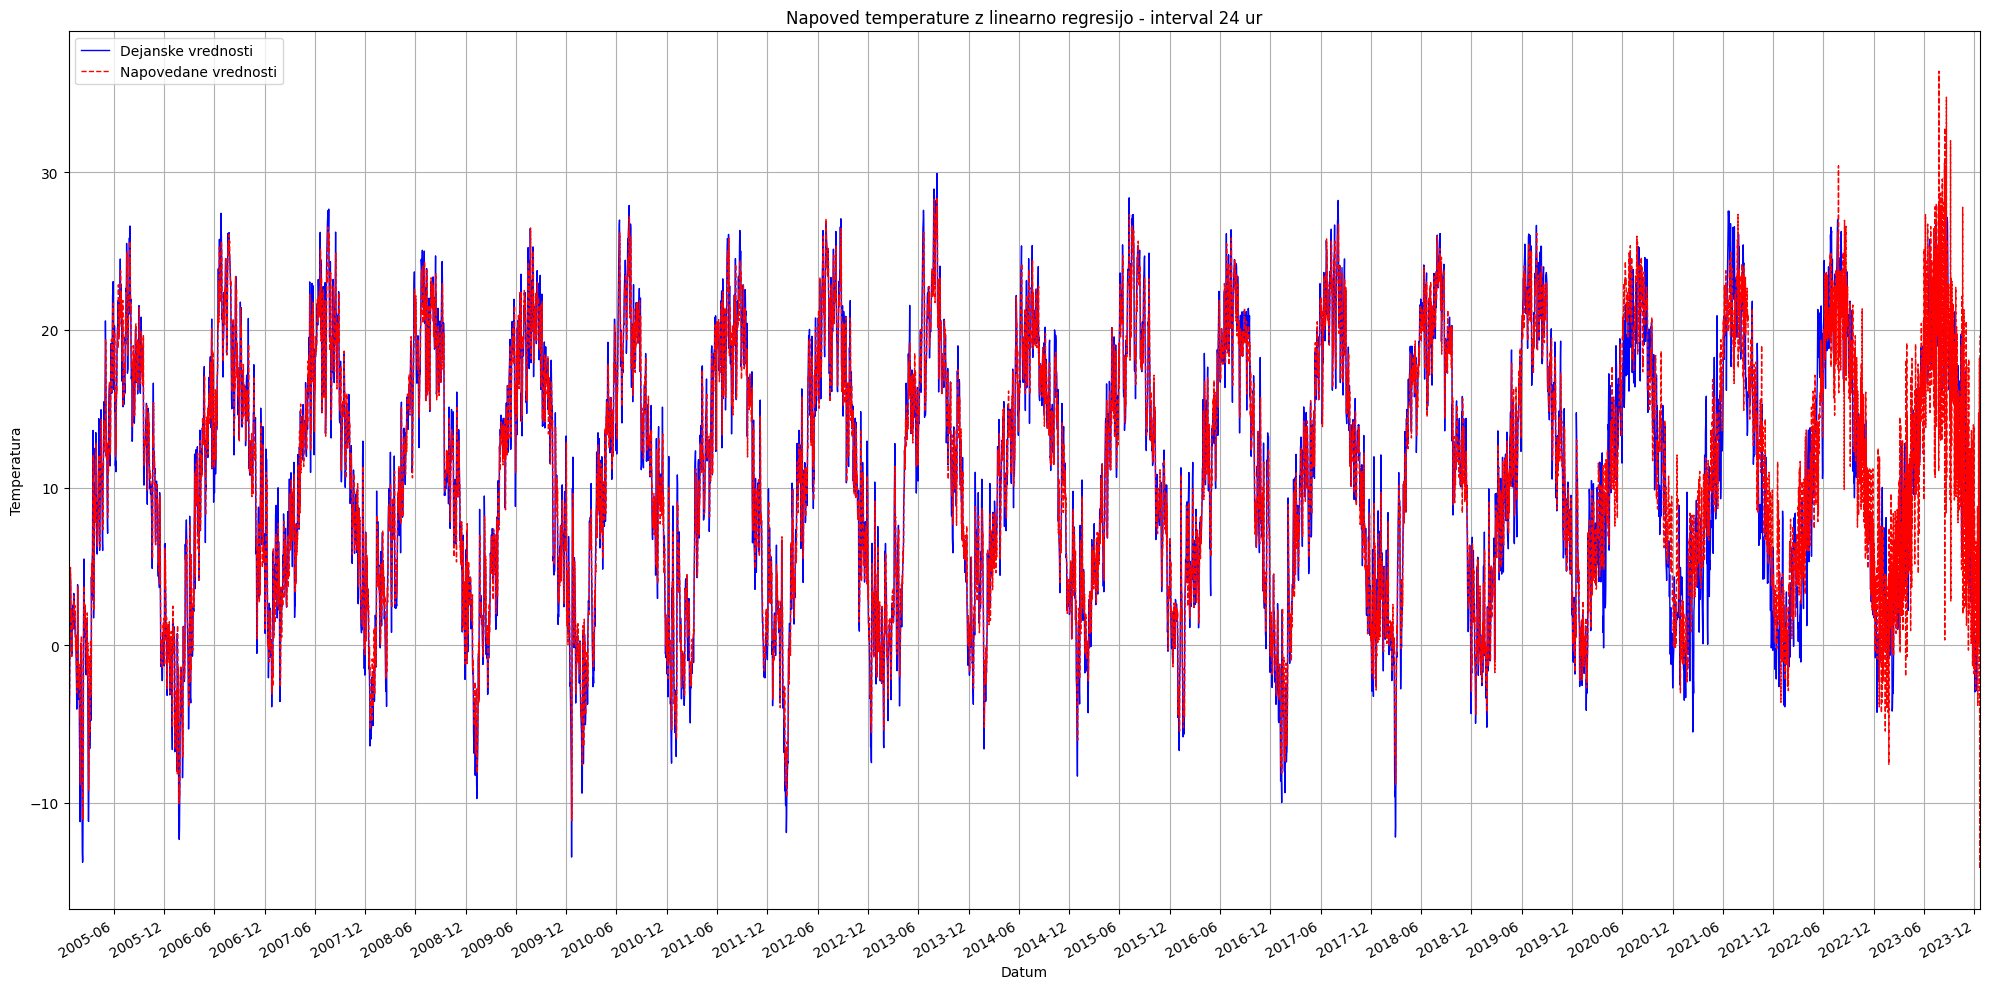

In [208]:
plt.figure(figsize=(20, 10))

plt.plot(stvari_za_graf[2]["index"], stvari_za_graf[2]["dejanske"], label='Dejanske vrednosti', color='blue', linewidth=1)
plt.plot(stvari_za_graf[2]["index"], stvari_za_graf[2]["napovedane"], label='Napovedane vrednosti', color='red', linewidth=1, linestyle='dashed')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.gcf().autofmt_xdate()
plt.xlim(stvari_za_graf[2]["min"], stvari_za_graf[2]["max"])

plt.title('Napoved temperature z linearno regresijo - interval 24 ur')
plt.xlabel('Datum')
plt.ylabel('Temperatura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Rezultati
## Prvi način
### Linearna regresija
r2 score: 0.30922823832165725
mse: 56.47618738638741
### Odločitveno drevo
r2 score: -0.027555998738358012
mse: 84.01102701962608
### Naključen gozd
r2 score: 0.48218100476763126
mse: 42.33589765731008
## Drugi način
### Interval šestih ur
r2 score: 0.3230475110183366
mse: 50.149768654872
### Interval dvanajstih ur
r2 score: 0.6650589820042194
mse: 22.956138251997597
### Interval štiriindvajsetih ur
r2 score: 0.6357661291611272
mse: 22.860771474237804


# Zaključek
Zelo blizu sta si bila intervala dvanajstih in štiriindvajsetih ur, ki sta bila tudi daleč najboljša. 
Najslabše se je izkazalo odločitveno drevo, ki ima edino negativno r2 število. 